# Extracting and plot spectra

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import fits

In [20]:
def extract_spec(path, namefile, z = 0.0138, xlim=None, ylim=None):
    """
    This function extracts a spectrum from a FITS file within a specified row range and plots the spectrum. 
    Additionally, it annotates known emission lines on the plot.
    
    Arguments:
    path (str): The path to the directory containing the FITS file.
    namefile (str): The name of the FITS file.
    rowi (int): The starting row to extract the spectrum.
    rowf (int): The ending row to extract the spectrum (+1 for compatibility with Python slicing).
    xlim (tuple): A tuple containing the x-axis limits for the plot (optional).
    ylim (tuple): A tuple containing the y-axis limits for the plot (optional).
    """
    # Emission lines
    emission_lines = {
        "[Ne III] 3869": 3869.76,
        "[Ne III] + H7 3968": 3967.46,
        "Hδ": 4101.74,
        "Fe III 4149?": 4148.75,
        "Hγ": 4340.471,
        "Ne II 4544?": 4544,
        "Ne II 4649?": 4649.37,
        "He II 4685": 4685,
        "[Ar IV] 4711": 4711.26,
        "[Ar IV] 4740": 4740.12,
        "Hβ": 4861.33,
        "[O III] 4958": 4958.911,
        "[O III] 5007": 5006.843,
        "5200.260": 5200.26,
        "[Fe III] 5412 or He II 5412": 5411.52,
        "Hα": 6562.82,
        "? 6879": 6879,
        "[Ar V] 7005": 7005.87,
        "C II 7113?": 7113.04,
        "[Ar III] 7135": 7135,
        "[Ar III] 7751": 7751,
        "He II 8236": 8236.79,
        "He I 8997?": 8997.99
    }

    # Open fits file and extract data
    hdu = fits.open(path + namefile)
    Flux = hdu[1].data
    nx, wav0, i0, dwav = [hdu[1].header[k] for k in ("NAXIS1", "CRVAL1", "CRPIX1", "CD1_1")]
    wavs = wav0 + (np.arange(nx) - (i0 - 1)) * dwav
    wavs *= 10

    
    
    # Calculate max flux around emission lines
    max_flux = []
    for wavelength in emission_lines.values():
        lambda_ob = wavelength * (z + 1)
        j = lambda_ob  - 10
        k = lambda_ob  + 10
        mask = (j < wavs) & (wavs < k)
        flux = Flux[mask]
        try:
            max_flux.append(np.max(flux))
        except ValueError:
            max_flux.append(10)

    # Plotting
    color_palette = sns.color_palette('Paired', 12)
    with sns.axes_style('white'):
        fig, ax = plt.subplots(figsize=(14, 8))
        ax.set_xlabel(r'Wavelength $(\AA)$', fontsize=20)
        ax.set_ylabel(r'Flux ($\mathrm{10^{-15} erg\ s^{-1} cm^{-2} \AA^{-1}}$)', fontsize=20)
        ax.tick_params(axis='x', labelsize=18)
        ax.tick_params(axis='y', labelsize=18)
        ax.plot(wavs, Flux, c="black")
        for label_, wll in emission_lines.items():
            wll_ob = wll * (z + 1)
            ax.axvline(wll * (z + 1), color='k', linewidth=0.4, alpha=0.5, linestyle='--')
            bbox_props = dict(boxstyle="round", fc="w", ec="0.88", alpha=0.6, pad=0.1)
            max_flux_val = max_flux[list(emission_lines.keys()).index(label_)]  # corrected line
            ax.annotate(label_, (wll_ob, max_flux_val), alpha=1, size=10,
                        xytext=(6.0, 5.6), textcoords='offset points', ha='right', va='bottom',
                        rotation=90, bbox=bbox_props, zorder=200)

    # Set limits if provided
    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])

    #plt.savefig(path + namefile.replace(".fits", ".pdf"))
    plt.show()  # Add this line if you want to display the plot

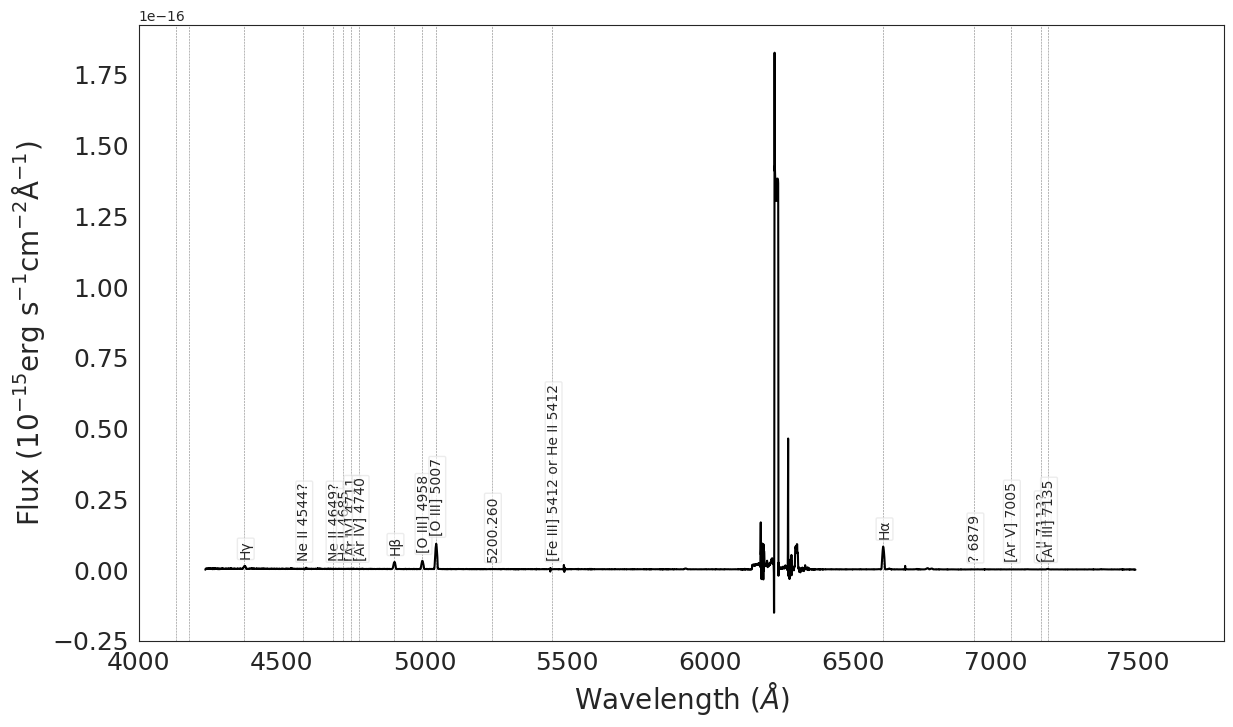

In [23]:
# Applying the function with specified parameters
extract_spec("../spectra_luis/", "n02n27_1D_aberturaOIII_test.fits", z = 0.0067,  xlim=(4000, 7800))#, ylim=(-0.8, 23))

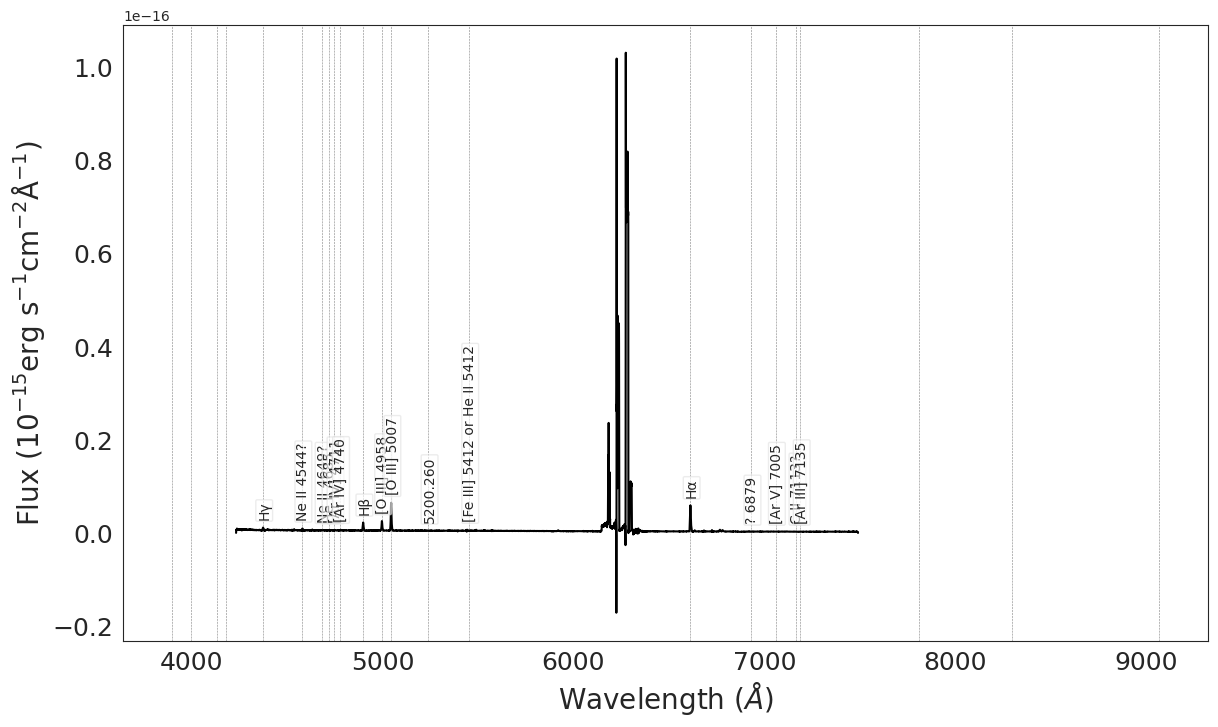

In [24]:
extract_spec("../spectra_luis/", "n13s01_1D_aberturaOIII.fits", z =  0.0075)# xlim=(4800, 9100), ylim=(-0.1, 17))